In [1]:
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import re
plt.rcParams['pdf.fonttype'] = 42

In [2]:
#元データの読み込み
dirs = glob.glob("./_*_*csv")
df_data_tot = pd.DataFrame({})
for file in dirs:
    df_data = pd.read_csv(file)
    #正規表現によるプロモーター名の抽出
    pattern = "_\D.*_"
    promoter = re.findall(pattern, file)[0][1:-1]
    pattern = "_\d+msec"
    exposure = re.findall(pattern, file)[0][1:-4]
    mean = [i for i in df_data["Mean"]]
    temp = pd.DataFrame([mean, [promoter for i in range(len(mean))], [exposure for i in range(len(mean))]],
                       index=["mean", "promoter", "exposure"])
    df_data_tot = pd.concat([df_data_tot, temp.T])
print(df_data_tot)


        mean promoter exposure
0    499.652      T21      400
1    490.971      T21      400
2    680.609      T21      400
3    565.304      T21      400
4     620.13      T21      400
..       ...      ...      ...
20  3528.923      T13      400
21  3427.673      T13      400
22  3774.269      T13      400
23  2938.269      T13      400
24  3258.846      T13      400

[959 rows x 3 columns]


In [3]:
df_400 = df_data_tot.loc[df_data_tot["exposure"] == "400", ["mean", "promoter"]]
print(df_400)
df_1000 = df_data_tot.loc[df_data_tot["exposure"] == "1000", ["mean", "promoter"]]
print(df_1000)

        mean promoter
0    499.652      T21
1    490.971      T21
2    680.609      T21
3    565.304      T21
4     620.13      T21
..       ...      ...
20  3528.923      T13
21  3427.673      T13
22  3774.269      T13
23  2938.269      T13
24  3258.846      T13

[548 rows x 2 columns]
       mean promoter
0   229.615       R3
1   168.192       R3
2   186.481       R3
3   187.058       R3
4   190.173       R3
..      ...      ...
20  467.925      PO1
21  503.038      PO1
22  565.525      PO1
23   303.55      PO1
24  364.712      PO1

[411 rows x 2 columns]


In [4]:
#A1の値で規格化
mean_A1_400 = df_data_tot.loc[(df_data_tot["promoter"] == "A1") & (df_data_tot["exposure"] == "400"), "mean"].mean()
df_400["mean"] = df_400["mean"]/mean_A1_400
print(df_400)

mean_A1_1000 = df_data_tot.loc[(df_data_tot["promoter"] == "A1") & (df_data_tot["exposure"] == "1000"), "mean"].mean()
df_1000["mean"] = df_1000["mean"]/mean_A1_1000
print(df_1000)


        mean promoter
0    0.07982      T21
1   0.078433      T21
2   0.108728      T21
3   0.090308      T21
4   0.099066      T21
..       ...      ...
20  0.563748      T13
21  0.547574      T13
22  0.602943      T13
23  0.469391      T13
24  0.520603      T13

[548 rows x 2 columns]
        mean promoter
0   0.011999       R3
1   0.008789       R3
2   0.009745       R3
3   0.009775       R3
4   0.009938       R3
..       ...      ...
20  0.024452      PO1
21  0.026287      PO1
22  0.029553      PO1
23  0.015863      PO1
24  0.019059      PO1

[411 rows x 2 columns]


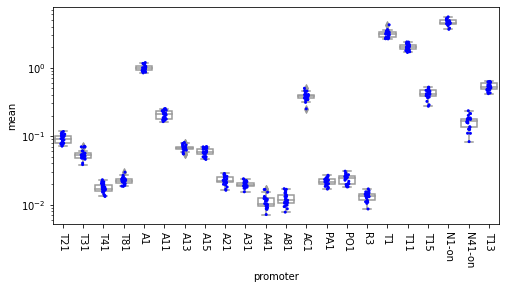

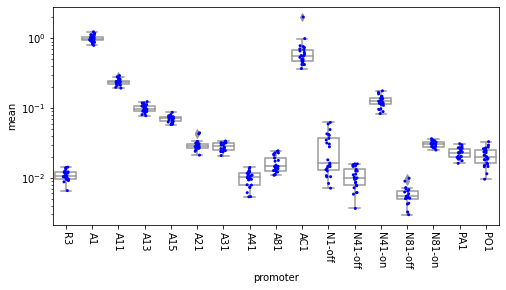

In [5]:
#プロット
fig = plt.figure(figsize=(8, 4))
sns.stripplot(x="promoter", y="mean", data=df_400, color="blue", size=3)
sns.boxplot(x="promoter", y="mean", data=df_400, color="white")
plt.yscale("log")
plt.xticks(rotation=-90)
fig.savefig("__result_400.png")
fig.savefig("__result_400.pdf")
plt.show()

fig = plt.figure(figsize=(8, 4))
sns.stripplot(x="promoter", y="mean", data=df_1000, color="blue", size=3)
sns.boxplot(x="promoter", y="mean", data=df_1000, color="white")
plt.yscale("log")
plt.xticks(rotation=-90)
fig.savefig("__result_1000.png")
fig.savefig("__result_1000.pdf")
plt.show()


In [6]:
#結果チェック
mean_400 = df_400.groupby("promoter").mean()
print(mean_400)
mean_1000 = df_1000.groupby("promoter").mean()
print(mean_1000)

              mean
promoter          
A1        1.000000
A11       0.205867
A13       0.067585
A15       0.059095
A21       0.022577
A31       0.019542
A41       0.011098
A81       0.012105
AC1       0.381706
N1-on     4.613255
N41-on    0.161829
PA1       0.021706
PO1       0.023504
R3        0.013098
T1        3.125868
T11       1.988506
T13       0.533734
T15       0.420348
T21       0.091943
T31       0.054059
T41       0.017522
T81       0.022504
              mean
promoter          
A1        1.000000
A11       0.238843
A13       0.100013
A15       0.069999
A21       0.029680
A31       0.028449
A41       0.009965
A81       0.016119
AC1       0.634265
N1-off    0.025606
N41-off   0.010572
N41-on    0.126231
N81-off   0.005788
N81-on    0.030737
PA1       0.023034
PO1       0.020826
R3        0.011039


In [9]:
#二つのデータフレームを統合
temp = df_400.loc[(df_400["promoter"] == "N1-on") | (df_400["promoter"] == "N1-off") | (df_400["promoter"] == "T1") | (df_400["promoter"] == "T11") | 
                   (df_400["promoter"] == "T13") | (df_400["promoter"] == "T15") | (df_400["promoter"] == "T21") | (df_400["promoter"] == "T31") | 
                   (df_400["promoter"] == "T41") | (df_400["promoter"] == "T81")]
df_integrated = pd.concat([df_1000, temp])
print(df_integrated)
mean_df_integrated = df_integrated.groupby("promoter", as_index=False).mean()
df_sort = mean_df_integrated.sort_values("mean")
print(df_sort)
promoter_ordered = df_sort["promoter"].unique().tolist()
print(promoter_ordered)
df_sort.to_csv("./_promoter_list.csv")

        mean promoter
0   0.011999       R3
1   0.008789       R3
2   0.009745       R3
3   0.009775       R3
4   0.009938       R3
..       ...      ...
20  0.563748      T13
21  0.547574      T13
22  0.602943      T13
23  0.469391      T13
24  0.520603      T13

[636 rows x 2 columns]
   promoter      mean
13  N81-off  0.005788
6       A41  0.009965
11  N41-off  0.010572
17       R3  0.011039
7       A81  0.016119
24      T41  0.017522
16      PO1  0.020826
25      T81  0.022504
15      PA1  0.023034
9    N1-off  0.025606
5       A31  0.028449
4       A21  0.029680
14   N81-on  0.030737
23      T31  0.054059
3       A15  0.069999
22      T21  0.091943
2       A13  0.100013
12   N41-on  0.126231
1       A11  0.238843
21      T15  0.420348
20      T13  0.533734
8       AC1  0.634265
0        A1  1.000000
19      T11  1.988506
18       T1  3.125868
10    N1-on  4.613255
['N81-off', 'A41', 'N41-off', 'R3', 'A81', 'T41', 'PO1', 'T81', 'PA1', 'N1-off', 'A31', 'A21', 'N81-on', 'T31', 'A15',

In [8]:
df_tot = pd.DataFrame({})
print(df_integrated)
for cmp in promoter_ordered:
    a = df_integrated.loc[(df_integrated["promoter"] == cmp)]
    df_tot = pd.concat([df_tot, a])
print(df_tot)

        mean promoter
0   0.011999       R3
1   0.008789       R3
2   0.009745       R3
3   0.009775       R3
4   0.009938       R3
..       ...      ...
20  0.563748      T13
21  0.547574      T13
22  0.602943      T13
23  0.469391      T13
24  0.520603      T13

[636 rows x 2 columns]
        mean promoter
0   0.006786  N81-off
1   0.006477  N81-off
2    0.00508  N81-off
3   0.004224  N81-off
4    0.00512  N81-off
..       ...      ...
20  4.275187    N1-on
21  4.905424    N1-on
22  4.429866    N1-on
23  4.884402    N1-on
24  4.710303    N1-on

[636 rows x 2 columns]


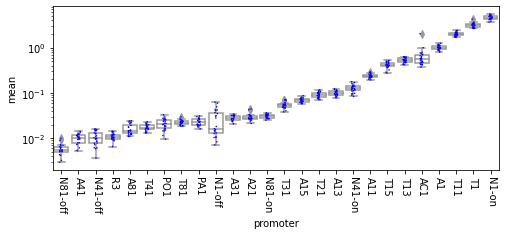

In [9]:
#プロット
fig = plt.figure(figsize=(8, 3))
sns.stripplot(x="promoter", y="mean", data=df_tot, color="blue", size=1.5)
sns.boxplot(x="promoter", y="mean", data=df_tot, color="white")
plt.yscale("log")
plt.xticks(rotation=-90)
fig.savefig("__result_tot.png")
fig.savefig("__result_tot.pdf")
plt.show()
